In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
pd.set_option('display.max_columns', 500)

from allensdk.brain_observatory.behavior.behavior_ophys_experiment import BehaviorOphysExperiment
from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorOphysProjectCache
import os

import allensdk
import pkg_resources

# Suppress all warnings because there are a lot of annoying user warnings
import warnings
warnings.filterwarnings("ignore")

# Setting up InteractiveShell for better df visualization
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


print("Import confirmed")
print("Allensdk version : ", allensdk.__version__)

/usr/local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Import confirmed
Allensdk version :  2.16.2


In [2]:
# Define the directory for the cache to prevent downloading every time
cache_dir = "./visual_behavior_cache"
if not os.path.exists(cache_dir):
    os.makedirs(cache_dir)

cache = VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=cache_dir)


ophys_session_table.csv: 100% 247k/247k [00:03<00:00, 73.4kMB/s] 
behavior_session_table.csv: 100% 1.59M/1.59M [00:02<00:00, 716kMB/s] 
ophys_experiment_table.csv: 100% 657k/657k [00:00<00:00, 1.59MMB/s] 
ophys_cells_table.csv: 100% 4.28M/4.28M [00:01<00:00, 3.41MMB/s]


In [3]:
# Load experiment metadata
experiments_table = cache.get_ophys_experiment_table()

# Select a specific experiment by ID
experiment_id = experiments_table.index[0]  # Example: take the first experiment

experiments_table.head()

,behavior_session_id,ophys_session_id,ophys_container_id,mouse_id,indicator,full_genotype,driver_line,cre_line,reporter_line,sex,age_in_days,imaging_depth,targeted_structure,targeted_imaging_depth,imaging_plane_group,project_code,session_type,session_number,image_set,behavior_type,passive,experience_level,prior_exposures_to_session_type,prior_exposures_to_image_set,prior_exposures_to_omissions,date_of_acquisition,equipment_name,published_at,isi_experiment_id,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
951980471,951520319,951410079,1018028342,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,206,150,VISp,150,0,VisualBehaviorMultiscope,OPHYS_1_images_A,1,A,active_behavior,False,Familiar,0,65,0,2019-09-20 09:59:38.837000+00:00,MESO.1,2021-03-25,848974280,0
951980473,951520319,951410079,1018028345,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,206,225,VISp,225,0,VisualBehaviorMultiscope,OPHYS_1_images_A,1,A,active_behavior,False,Familiar,0,65,0,2019-09-20 09:59:38.837000+00:00,MESO.1,2021-03-25,848974280,1
951980475,951520319,951410079,1018028339,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,206,75,VISp,75,1,VisualBehaviorMultiscope,OPHYS_1_images_A,1,A,active_behavior,False,Familiar,0,65,0,2019-09-20 09:59:38.837000+00:00,MESO.1,2021-03-25,848974280,2
951980479,951520319,951410079,1018028354,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,206,150,VISl,150,2,VisualBehaviorMultiscope,OPHYS_1_images_A,1,A,active_behavior,False,Familiar,0,65,0,2019-09-20 09:59:38.837000+00:00,MESO.1,2021-03-25,848974280,3
951980481,951520319,951410079,1018028357,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,206,225,VISl,225,2,VisualBehaviorMultiscope,OPHYS_1_images_A,1,A,active_behavior,False,Familiar,0,65,0,2019-09-20 09:59:38.837000+00:00,MESO.1,2021-03-25,848974280,4


In [4]:
# loading cache of a single experiment to explore
experiment = cache.get_behavior_ophys_experiment(experiment_id)

behavior_ophys_experiment_951980471.nwb: 100% 248M/248M [00:37<00:00, 6.69MMB/s]    


In [5]:
# metadata of single experiment
experiment.metadata

{'equipment_name': 'MESO.1',
 'sex': 'F',
 'age_in_days': 206,
 'stimulus_frame_rate': 60.0,
 'session_type': 'OPHYS_1_images_A',
 'date_of_acquisition': datetime.datetime(2019, 9, 20, 9, 59, 38, 837000, tzinfo=tzlocal()),
 'reporter_line': 'Ai148(TIT2L-GC6f-ICL-tTA2)',
 'cre_line': 'Sst-IRES-Cre',
 'behavior_session_uuid': UUID('592420fb-911d-41c5-8763-4ebdeb0ef416'),
 'driver_line': ['Sst-IRES-Cre'],
 'mouse_id': '457841',
 'project_code': 'VisualBehaviorMultiscope',
 'full_genotype': 'Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt',
 'behavior_session_id': 951520319,
 'indicator': 'GCaMP6f',
 'emission_lambda': 520.0,
 'excitation_lambda': 910.0,
 'ophys_container_id': 1018028342,
 'field_of_view_height': 512,
 'field_of_view_width': 512,
 'imaging_depth': 150,
 'targeted_imaging_depth': 150,
 'imaging_plane_group': 0,
 'imaging_plane_group_count': 4,
 'ophys_experiment_id': 951980471,
 'ophys_frame_rate': 11.0,
 'ophys_session_id': 951410079,
 'targeted_structure': 'VISp'}

From the metadata we know that this is a Multiscope experiment where 2 areas at 4 different depths were measured.

In [6]:
# Preview of stimuli dataframe
stimulus_table = experiment.stimulus_presentations
stimulus_table.tail()

,stimulus_block,stimulus_block_name,image_index,image_name,movie_frame_index,duration,start_time,end_time,start_frame,end_frame,is_change,is_image_novel,omitted,movie_repeat,flashes_since_change,trials_id,active,stimulus_name,is_sham_change
stimulus_presentations_id,,,,,,,,,,,,,,,,,,,
13798,3,natural_movie_one,-99,NaN,895,0.03333,4513.697425,4513.730755,270042,270043,False,<NA>,<NA>,9,9002,-99,False,natural_movie_one,False
13799,3,natural_movie_one,-99,NaN,896,0.03339,4513.730755,4513.764145,270044,270045,False,<NA>,<NA>,9,9003,-99,False,natural_movie_one,False
13800,3,natural_movie_one,-99,NaN,897,0.03337,4513.764145,4513.797515,270046,270047,False,<NA>,<NA>,9,9004,-99,False,natural_movie_one,False
13801,3,natural_movie_one,-99,NaN,898,0.03332,4513.797515,4513.830835,270048,270049,False,<NA>,<NA>,9,9005,-99,False,natural_movie_one,False
13802,3,natural_movie_one,-99,NaN,899,0.03339,4513.830835,4513.864225,270050,270051,False,<NA>,<NA>,9,9006,-99,False,natural_movie_one,False


In [7]:
# Preview of dff_trace dataframe
dff_table = experiment.dff_traces
dff_table.head()
print(f"Shape of dff signals : {dff_table['dff'].iloc[0].shape}")

,cell_roi_id,dff
cell_specimen_id,,
1086613265,1080743723,"[0.9365729093551636, 0.5824856162071228, 1.296..."
1086613823,1080743752,"[0.555761456489563, 0.7478731870651245, 0.4397..."
1086619526,1080743754,"[0.2593991160392761, 0.30149346590042114, 0.34..."
1086614149,1080743763,"[0.4112476706504822, 0.1977161169052124, 0.143..."
1086614351,1080743765,"[0.08977238088846207, 0.0746675506234169, 0.26..."


Shape of dff signals : (48316,)


We can confirm that there are indeed roughly 11 frames per second per neuron during the whole experiment if we divide the lenght of the dff array by the max value of end_time. Hence the signals should be evenly spread across the whole timescale.

In [8]:
# Preview of event dataframe
event_table = experiment.events
event_table.head()

,cell_roi_id,events,filtered_events,lambda,noise_std
cell_specimen_id,,,,,
1086613265,1080743723,"[0.0, 0.0, 0.5568727052177824, 0.0, 0.46726365...","[0.0, 0.0, 0.40076209492295517, 0.148502141158...",0.0484,0.068267
1086613823,1080743752,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.1441,0.118111
1086619526,1080743754,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0966,0.097046
1086614149,1080743763,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0771,0.086072
1086614351,1080743765,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0801,0.088142


In [9]:
# Preview of metadata for specific cells
cell_specimen_table = experiment.cell_specimen_table
cell_specimen_table.loc[(cell_specimen_table['cell_roi_id'] ==  1080743723)]

,cell_roi_id,height,mask_image_plane,max_correction_down,max_correction_left,max_correction_right,max_correction_up,valid_roi,width,x,y,roi_mask
cell_specimen_id,,,,,,,,,,,,
1086613265,1080743723,19,0,30.0,4.0,16.0,6.0,True,25,288,190,"[[False, False, False, False, False, False, Fa..."


In [10]:
# Preview of running speed dataframe
running_speed_table = experiment.running_speed
running_speed_table

,timestamps,speed
0,6.87653,0.039084
1,9.28021,1.448758
2,9.29687,2.724152
3,9.31357,3.763775
4,9.33024,4.505150
...,...,...
270048,4513.74432,0.994029
270049,4513.76099,1.565881
270050,4513.77764,2.329033
270051,4513.79435,3.250289


Not included in metadata but running speed is roughly measured every at 60hz. (270053/4513). However the measurements don't seem to be perfectly spread out.

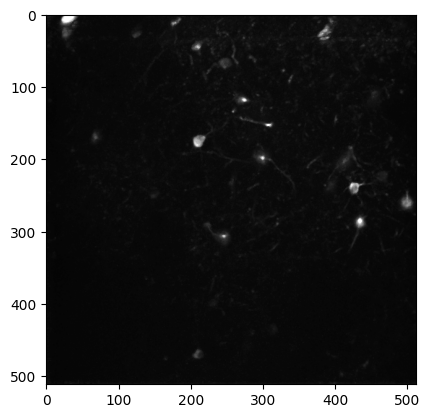

In [11]:
# Plotting max projection of the imaging plane from this experiment to get overview of 
plt.imshow(experiment.max_projection, cmap='gray')
plt.show()